Short script to visualize the distribution of variant effects within the 16 positions of the FCY1 fragment 2 chosen as "spike ins"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
plt.rcParams['savefig.dpi'] = 600

DMS scores in 5-FC and cytosine from Després et al. (2022) are used

In [5]:
DMS_scores = pd.read_csv("Després_supp_data/S_data_6.csv")[['codon', 'wt', 'measured', 'CY_score', 'FC_score']]

In [6]:
DMS_scores

,codon,wt,measured,CY_score,FC_score
0,2,V,*,0.014447,-0.197819
1,2,V,G,0.768967,-0.163936
2,2,V,A,0.788358,-0.067115
3,2,V,V,0.822532,-0.182365
4,2,V,L,0.743511,-0.176187
...,...,...,...,...,...
3292,158,E,H,0.815396,-0.618938
3293,158,E,K,0.977290,-0.255429
3294,158,E,R,0.786936,-0.553013
3295,158,E,D,0.792971,-0.613846


10 positions are chosen randomly within the selected region, in addition to 6 positions chosen arbitrarily because they include some mutants with interesting (intermediate) phenotypes according to smaller scale validation experiments.

In [8]:
region = [65, 115] # The last position included in the sequenced region is 114
all_possible = list(range(65, 115))

# already selected positions are removed
chosen_pos = [65, 69, 71, 76, 89, 96]
all_available = list(filter(lambda pos: pos not in chosen_pos, all_possible))

# selecting 10 new positions and adding them to the list
pos_additions = sample(all_available, 10)
chosen_spikeins = chosen_pos + pos_additions
chosen_spikeins.sort()

Keeping the randomly-chosen positions which were selected

In [10]:
chosen_spikeins = [65, 69, 70, 71, 74, 75, 76, 83, 89, 93, 95, 96, 99, 100, 101]
# 103 was initially also included, but it did not grow and could not be included when the pools were prepared

New dataframes are created, corresponding respectively to the positions selected as spike ins and to the complete fragment 2

In [12]:
spikeins = DMS_scores[DMS_scores['codon'].isin(chosen_spikeins)].copy().reset_index(drop=True)
spikeins['Subset'] = 'FCY1 set'

DMS_scores['Subset'] = 'Whole\nexperiment'

spike_comparison = pd.concat([spikeins, DMS_scores]).reset_index(drop=True)

Then, the corresponding distributions are plotted

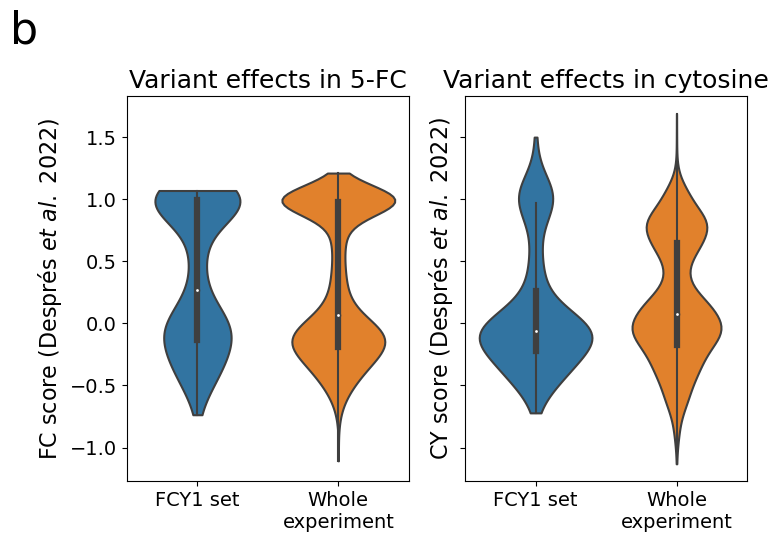

In [23]:
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 14

fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharex=True, sharey=True)

fragment2_5FC = sns.violinplot(data=spike_comparison, y='FC_score', x='Subset', ax=axs[0], cut=0)
fragment2_CY = sns.violinplot(data=spike_comparison, y='CY_score', x='Subset', ax=axs[1], cut=0)

axs[0].set_title('Variant effects in 5-FC', fontsize=18)
axs[1].set_title('Variant effects in cytosine', fontsize=18)

axs[0].set_ylabel(r"FC score (Després $\it{et}$ $\it{al.}$ 2022)", fontsize=16)
axs[1].set_ylabel(r"CY score (Després $\it{et}$ $\it{al.}$ 2022)", fontsize=16)

axs[0].set_xlabel('')
axs[1].set_xlabel('')

axs[0].annotate('b', (-1.33, 2.25), fontsize=32, annotation_clip=False)

comparison_spike_ins = plt.gcf()
comparison_spike_ins.savefig("Supp_figs/S4_graph.tiff", bbox_inches='tight')